In [39]:
import pandas as pd
import numpy as np
#如果因为numpy版本问题，则可以把numpy版本降低为1.25.5、1.20.1
import toad

In [40]:
data = pd.read_csv('../data/germancredit.csv')
data.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [41]:
#把标签值的good和bad替换为数字，以供模型训练
data.replace({'good':0,'bad':1},inplace=True)
data.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


In [42]:
data.shape


(1000, 21)

In [43]:
#分箱
combiner = toad.transform.Combiner()

In [44]:
#调用fit，进行分箱，method=chi就是卡方分箱,toad库会对每一列都进行分箱
combiner.fit(data,y='creditability',method='chi',min_samples=0.05)

In [45]:
bins = combiner.export()
bins

{'status.of.existing.checking.account': [['no checking account'],
  ['... >= 200 DM / salary assignments for at least 1 year'],
  ['0 <= ... < 200 DM'],
  ['... < 0 DM']],
 'duration.in.month': [9, 12, 13, 16, 36, 45],
 'credit.history': [['critical account/ other credits existing (not at this bank)'],
  ['delay in paying off in the past',
   'existing credits paid back duly till now'],
  ['all credits at this bank paid back duly',
   'no credits taken/ all credits paid back duly']],
 'purpose': [['retraining', 'car (used)'],
  ['radio/television'],
  ['furniture/equipment'],
  ['domestic appliances', 'business', 'repairs'],
  ['car (new)'],
  ['others', 'education']],
 'credit.amount': [3556],
 'savings.account.and.bonds': [['... >= 1000 DM',
   '500 <= ... < 1000 DM',
   'unknown/ no savings account'],
  ['100 <= ... < 500 DM'],
  ['... < 100 DM']],
 'present.employment.since': [['4 <= ... < 7 years'],
  ['... >= 7 years'],
  ['1 <= ... < 4 years'],
  ['unemployed'],
  ['... < 1 year

In [46]:
#获取Duration.in.month的分箱结果
bins['duration.in.month']

[['critical account/ other credits existing (not at this bank)'],
 ['delay in paying off in the past',
  'existing credits paid back duly till now'],
 ['all credits at this bank paid back duly',
  'no credits taken/ all credits paid back duly']]

In [47]:
c2 = toad.transform.Combiner()

In [48]:
#单独训练duration.in.month特征，并且把这列特征分箱后的结果画出来
#n_bins:箱的数量
c2.fit(data[['duration.in.month','creditability']],
       y='creditability',method='chi',n_bins=7)


In [49]:
#参考官网，应用结果
import matplotlib.pyplot as plt
from toad.plot import bin_plot


<AxesSubplot:xlabel='credit.history', ylabel='prop'>

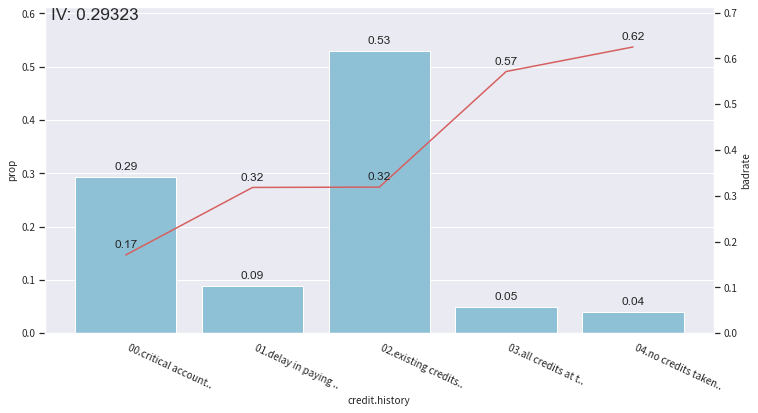

In [50]:
transformed = c2.transform(data[['duration.in.month','creditability']],labels=True)
bin_plot(transformed,x='duration.in.month',target='creditability')

In [51]:
#把箱的数量改为5
c2 = toad.transform.Combiner()
c2.fit(data[['duration.in.month','creditability']],
       y='creditability',method='chi',n_bins=5)
transformed = c2.transform(data[['duration.in.month','creditability']],labels=True)

<AxesSubplot:xlabel='credit.history', ylabel='prop'>

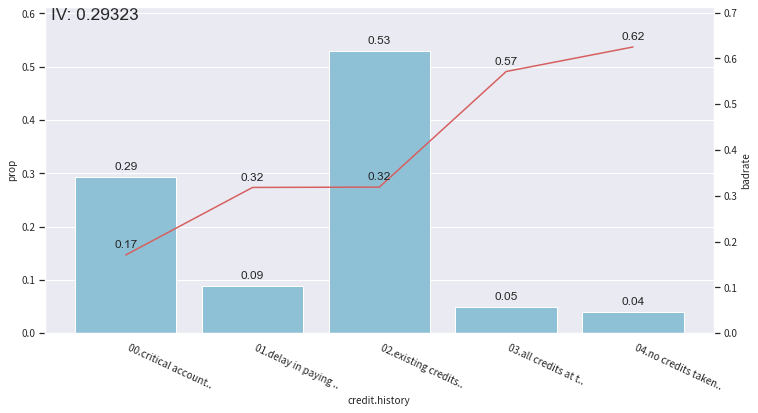

In [52]:
bin_plot(transformed,x='duration.in.month',target='creditability')


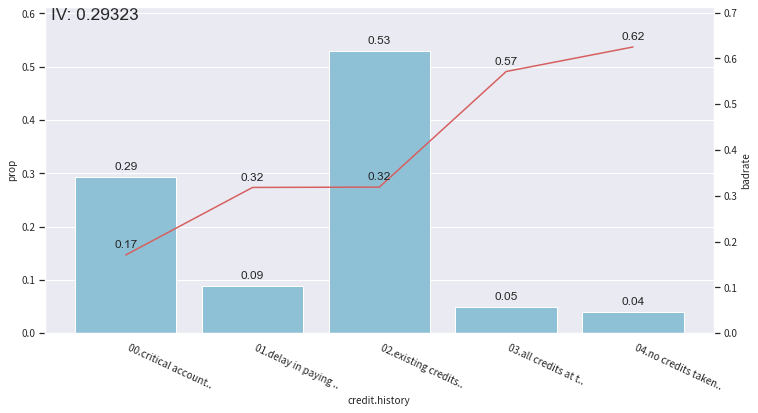

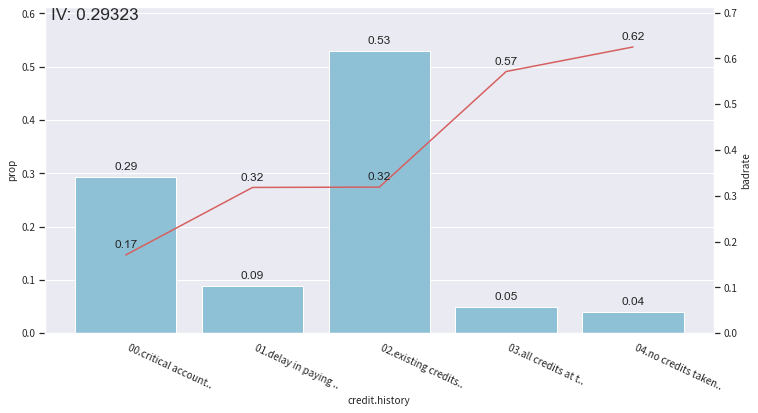

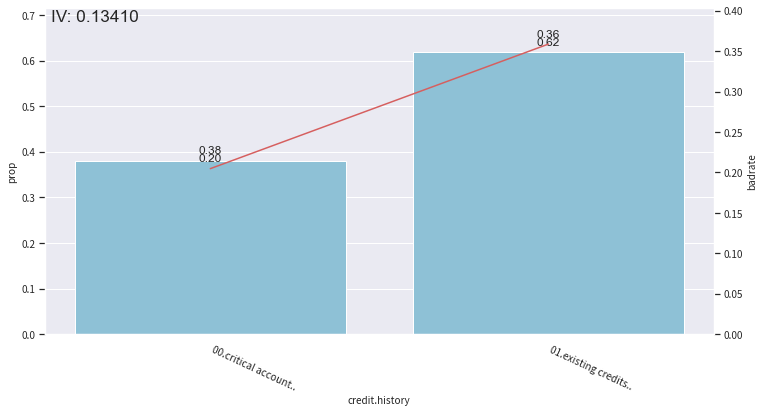

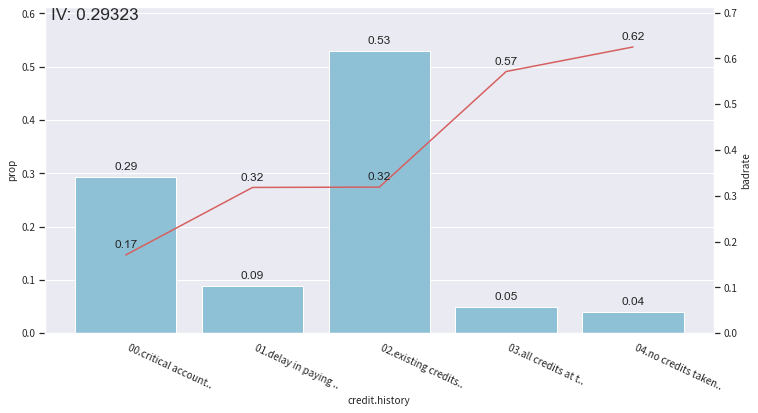

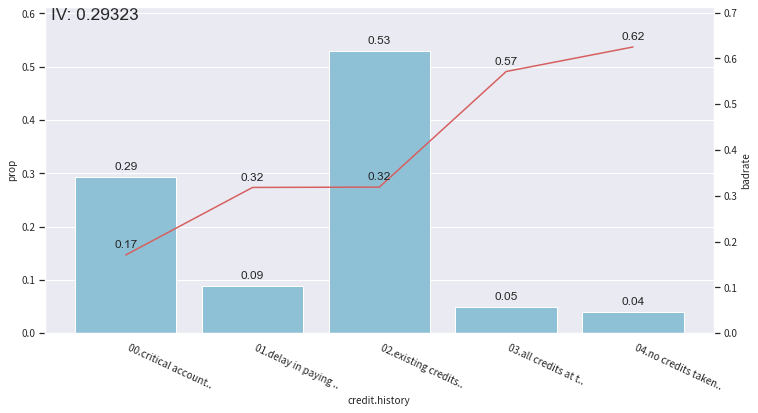

In [53]:
#其他分箱效果展示
for method in ['chi', 'dt', 'quantile', 'step', 'kmeans']:
    c2 = toad.transform.Combiner()
    c2.fit(data[['duration.in.month','creditability']],
             y='creditability', method=method, n_bins=5)
    bin_plot(c2.transform(data[['duration.in.month','creditability']],labels=True),
                x='duration.in.month',target='creditability')


* WOE 编码


In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.drop("creditability",axis=1),
                 data['creditability'],test_size=0.25,
                 random_state=450)


In [68]:
data_train = pd.concat([x_train,y_train],axis=1)
data_train

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
569,... < 0 DM,48,existing credits paid back duly till now,radio/television,6758,... < 100 DM,1 <= ... < 4 years,3,female : divorced/separated/married,none,...,"car or other, not in attribute Savings account...",31,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes,1
574,0 <= ... < 200 DM,9,existing credits paid back duly till now,radio/television,1082,... < 100 DM,... >= 7 years,4,male : single,none,...,"car or other, not in attribute Savings account...",27,none,own,2,unskilled - resident,1,none,yes,0
993,... < 0 DM,36,existing credits paid back duly till now,furniture/equipment,3959,... < 100 DM,unemployed,4,male : single,none,...,building society savings agreement/ life insur...,30,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,0
355,0 <= ... < 200 DM,24,existing credits paid back duly till now,car (new),1246,... < 100 DM,... < 1 year,4,male : single,none,...,real estate,23,stores,own,1,unskilled - resident,1,none,yes,1
508,no checking account,24,existing credits paid back duly till now,radio/television,1413,... < 100 DM,1 <= ... < 4 years,4,male : married/widowed,none,...,building society savings agreement/ life insur...,28,none,own,1,skilled employee / official,1,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,no checking account,18,existing credits paid back duly till now,furniture/equipment,2515,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,real estate,43,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes,0
462,0 <= ... < 200 DM,12,existing credits paid back duly till now,furniture/equipment,3017,... < 100 DM,... < 1 year,3,female : divorced/separated/married,none,...,real estate,34,none,rent,1,management/ self-employed/ highly qualified em...,1,none,yes,0
302,... >= 200 DM / salary assignments for at leas...,24,critical account/ other credits existing (not ...,car (new),1344,unknown/ no savings account,4 <= ... < 7 years,4,male : single,none,...,real estate,37,bank,own,2,unskilled - resident,2,none,yes,1
613,... < 0 DM,24,all credits at this bank paid back duly,car (used),3632,... < 100 DM,1 <= ... < 4 years,1,female : divorced/separated/married,guarantor,...,"car or other, not in attribute Savings account...",22,bank,rent,1,skilled employee / official,1,none,no,0


In [70]:
data_train['type'] = 'train'
data_test = pd.concat([x_test,y_test],axis=1)
data_test['type'] = 'test'

In [71]:
#分箱操作
adj_bins = {'duration.in.month':[9, 12, 18, 33]}
c2 = toad.transform.Combiner()
#手动分箱，等价于fit
c2.set_rules(adj_bins)


In [72]:
#把原来的数据拼接回去，并且带上了type字段
data_ = pd.concat([data_train,data_test],axis=0)

In [73]:
temp_data = c2.transform(data_[['duration.in.month',
                                'creditability',
                                'type']])

<AxesSubplot:xlabel='value', ylabel='proportion'>

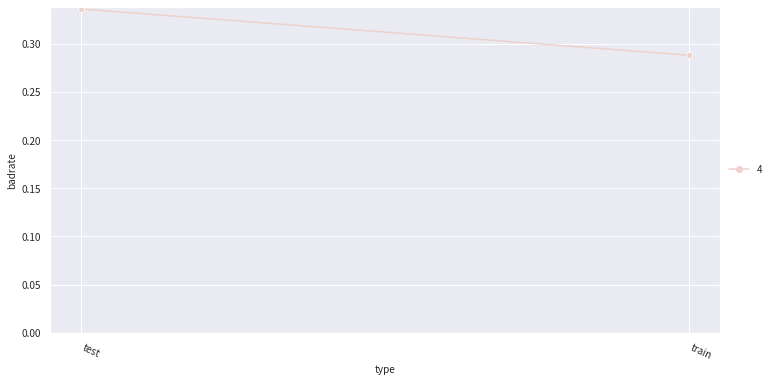

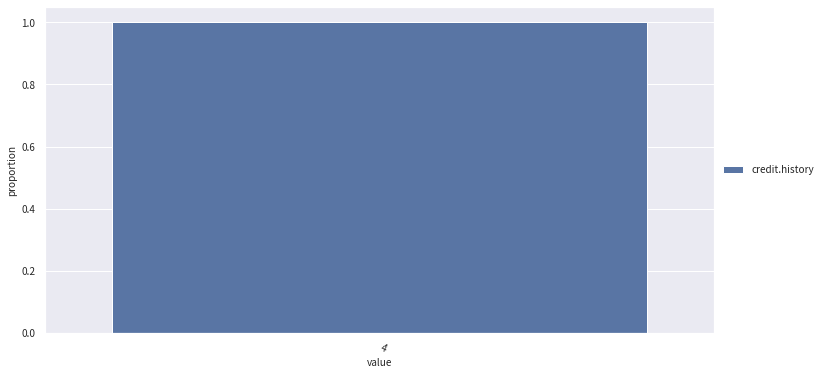

In [60]:
#画图
from toad.plot import badrate_plot,proportion_plot
badrate_plot(temp_data,target='creditability',
             x='type',
             by='duration.in.month')
proportion_plot(temp_data['duration.in.month'])

In [61]:
#调整箱数，使得具备单调性
adj_bins = {'duration.in.month':[9, 18, 33]}
c2.set_rules(adj_bins)


<AxesSubplot:xlabel='type', ylabel='badrate'>

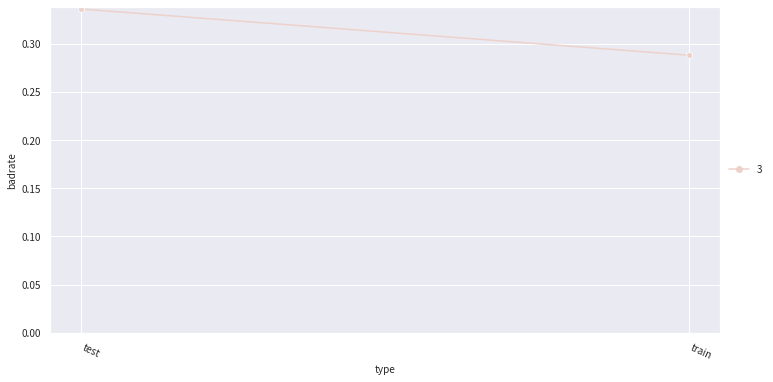

In [62]:
#调整完后，badrate具备单调性了
temp_data = c2.transform(data_[['duration.in.month',
                                'creditability',
                                'type']])

badrate_plot(temp_data,target='creditability',
             x='type',
             by='duration.in.month')

In [63]:
#WOE编码
#创建编码对象
transfer = toad.transform.WOETransformer()


In [64]:
#只是对训练集进行编码，如果需要做预测，同理也需要编码
binned_data = c2.transform(data_train)
binned_data

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability,type
673,no checking account,0,3,car (new),2080,500 <= ... < 1000 DM,1 <= ... < 4 years,1,male : married/widowed,none,...,24,none,own,1,skilled employee / official,1,none,yes,0,train
107,0 <= ... < 200 DM,1,3,car (new),6078,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,32,none,own,1,skilled employee / official,1,none,yes,0,train
898,no checking account,1,3,furniture/equipment,2186,unknown/ no savings account,4 <= ... < 7 years,1,female : divorced/separated/married,none,...,33,bank,rent,1,unskilled - resident,1,none,yes,0,train
441,... < 0 DM,1,3,furniture/equipment,1620,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,co-applicant,...,30,none,own,1,skilled employee / official,1,none,yes,0,train
439,... >= 200 DM / salary assignments for at leas...,1,3,business,609,... < 100 DM,... < 1 year,4,female : divorced/separated/married,none,...,26,none,own,1,unemployed/ unskilled - non-resident,1,none,yes,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,no checking account,2,3,radio/television,3105,unknown/ no savings account,... < 1 year,4,male : single,none,...,25,none,own,2,skilled employee / official,1,none,yes,0,train
584,no checking account,1,3,car (new),2133,unknown/ no savings account,... >= 7 years,4,female : divorced/separated/married,none,...,52,none,for free,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,0,train
493,0 <= ... < 200 DM,0,3,radio/television,368,unknown/ no savings account,... >= 7 years,4,male : single,none,...,38,none,own,1,skilled employee / official,1,none,yes,0,train
527,no checking account,0,3,radio/television,1503,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,42,none,own,2,unskilled - resident,2,none,yes,0,train


In [65]:
#核心代码fit_transform
data_with_woe = transfer.fit_transform(binned_data,
                       binned_data['creditability'],
                       exclude=['creditability','type'])

In [66]:
data_with_woe.head()


,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,...,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability,type
673,-1.074952,-1.072045,0.0,0.400280,0.905117,-0.679003,0.091342,-0.181072,-0.021645,0.001147,...,0.697478,-0.088586,-0.251665,0.13294,-0.044459,-0.015658,0.072526,0.031222,0,train
107,0.369599,-0.249205,0.0,0.400280,0.905117,0.300698,-0.564559,-0.208880,-0.239556,0.001147,...,-0.093411,-0.088586,-0.251665,0.13294,-0.044459,-0.015658,0.072526,0.031222,0,train
898,-1.074952,-0.249205,0.0,0.091607,0.905117,-0.854381,-0.564559,-0.181072,0.325299,0.001147,...,0.530424,0.423279,0.505731,0.13294,0.014145,-0.015658,0.072526,0.031222,0,train
441,0.875847,-0.249205,0.0,0.091607,0.905117,0.300698,0.091342,-0.208880,0.325299,0.636853,...,-0.240015,-0.088586,-0.251665,0.13294,-0.044459,-0.015658,0.072526,0.031222,0,train
439,-0.966685,-0.249205,0.0,0.037617,0.905117,0.300698,0.524654,0.148254,0.325299,0.001147,...,-0.516268,-0.088586,-0.251665,0.13294,-0.273538,-0.015658,0.072526,0.031222,1,train
